In [2]:
import pandas as pd

file = 'stem_schedule.csv'
dataframe = pd.read_csv(file)

print(dataframe)

     Subj    Crs Sect                           Title       Start  \
0    BIOL  D006A  01Y  FORM/FUNCT IN THE BIOLGCL WRLD  01/08/2024   
1    BIOL  D006A  01Y  FORM/FUNCT IN THE BIOLGCL WRLD  01/08/2024   
2    BIOL  D006A  02Y  FORM/FUNCT IN THE BIOLGCL WRLD  01/08/2024   
3    BIOL  D006A  02Y  FORM/FUNCT IN THE BIOLGCL WRLD  01/08/2024   
4    BIOL  D006B  01Y        CELL & MOLECULAR BIOLOGY  01/08/2024   
..    ...    ...  ...                             ...         ...   
199  PHYS  D004C  12Y  PHYS SCI/ENG:FLUID/WAVOP/THERM  01/08/2024   
200  PHYS  D004C  12Y  PHYS SCI/ENG:FLUID/WAVOP/THERM  01/08/2024   
201  PHYS  D004C  13Y  PHYS SCI/ENG:FLUID/WAVOP/THERM  01/08/2024   
202  PHYS  D004C  13Y  PHYS SCI/ENG:FLUID/WAVOP/THERM  01/08/2024   
203  PHYS  D004C  13Y  PHYS SCI/ENG:FLUID/WAVOP/THERM  01/08/2024   

                  Time   Days    Room  
0                  TBA    TBA  ONLINE  
1    08:30 AM-11:20 AM    TTh  SC2108  
2                  TBA    TBA  ONLINE  
3    11:30 

In [3]:
# loading the columns we need

df = dataframe[['Time', 'Days', 'Title', 'Subj', 'Crs', 'Sect']]

df['Sect'][50:]

50      09
51      09
52      25
53      25
54      26
      ... 
199    12Y
200    12Y
201    13Y
202    13Y
203    13Y
Name: Sect, Length: 154, dtype: object

In [4]:
# this code will gather the unique times for each class and load them into a list

unique_times = set()

df['String_Time'] = df['Time'].astype(str)

unique_times = set()

for time_range in df['String_Time']:
    if time_range != 'TBA' and '-' in time_range: # skip 'TBA' entries and ensure there is a dash
        # The strip() function removes any leading/trailing whitespace
        cleaned_time_range = time_range.strip()
        # Add the cleaned time range to the set
        unique_times.add(cleaned_time_range)
        
sorted_unique_times = sorted(list(unique_times))

/var/folders/qs/kxz_m4m10b78vfjgbs36tjb40000gn/T/ipykernel_6694/1790256648.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['String_Time'] = df['Time'].astype(str)


OKAY NOW WE HAVE GATHERED ALL THE UNIQUE CLASSTIMES


In [6]:
# with sorted_unique_times we will look for overlaps with our data

# parse the sorted_unique_time_ranges list into a list of tuples
# each containing the start and end times as datetime.time objects
# compare each time range with every other time range to check for overlaps

from datetime import datetime, timedelta

# Function to parse a time range string into start and end datetime.time objects
def parse_time_range(time_range):
    start_str, end_str = time_range.split('-')
    start = datetime.strptime(start_str.strip(), '%I:%M %p').time()
    end = datetime.strptime(end_str.strip(), '%I:%M %p').time()
    return start, end

# Function to check if two time ranges overlap
def do_times_overlap(start1, end1, start2, end2):
    return max(start1, start2) < min(end1, end2)

def do_days_overlap(days1, days2):
    days1_set = set(days1)
    days2_set = set(days2)
    return any(day in days2_set for day in days1_set)

def calculate_overlap_duration(start1, end1, start2, end2):
    # ensure overlap
    if do_times_overlap(start1, end1, start2, end2):
        
        overlap_start = max(start1, start2)
        overlap_end = min(end1, end2)
        
        overlap_start_dt = datetime.combine(datetime.today(), overlap_start)
        overlap_end_dt = datetime.combine(datetime.today(), overlap_end)
        
        duration = (overlap_end_dt - overlap_start_dt).total_seconds() / 60
        return max(0, duration)
    else:
        return
    


parsed_time_ranges = [parse_time_range(time_range) for time_range in sorted_unique_times]

# Check for overlaps
overlaps = []
for i, time_range_1 in enumerate(parsed_time_ranges):
    for j, time_range_2 in enumerate(parsed_time_ranges):
        if i < j:  # Avoid comparing the same pair twice and comparing a range with itself
            start1, end1 = time_range_1
            start2, end2 = time_range_2
            if do_times_overlap(start1, end1, start2, end2):
                overlaps.append((sorted_unique_times[i], sorted_unique_times[j]))
                
                
class_info = [
    (row['Title'], row['Time'], row['Days'], row['Subj'], row['Crs'], row['Sect'])
    for _, row in df.iterrows()
    if row['Time'] != 'TBA' and row['Time'] != 'Time' and row['Subj'] != 'MATH' and not pd.isna(row['Title']) and not pd.isna(row['Time']) and not pd.isna(row['Days'])
]

for title1, time1, days1, subj1, crs1, sect1 in class_info:
    print(f" {title1}, {time1}, {days1}, {subj1}, {crs1}, {sect1}")


 FORM/FUNCT IN THE BIOLGCL WRLD, 08:30 AM-11:20 AM, TTh, BIOL, D006A, 01Y
 FORM/FUNCT IN THE BIOLGCL WRLD, 11:30 AM-02:20 PM, TTh, BIOL, D006A, 02Y
 CELL & MOLECULAR BIOLOGY, 09:30 AM-11:20 AM, MW, BIOL, D006B, 01Y
 CELL & MOLECULAR BIOLOGY, 09:30 AM-12:20 PM, TTh, BIOL, D006B, 01Y
 CELL & MOLECULAR BIOLOGY, 09:30 AM-11:20 AM, MW, BIOL, D006B, 02Y
 CELL & MOLECULAR BIOLOGY, 01:30 PM-04:20 PM, TTh, BIOL, D006B, 02Y
 CELL & MOLECULAR BIOLOGY, 10:30 AM-01:20 PM, MW, BIOL, D006B, 03Y
 CELL & MOLECULAR BIOLOGY, 01:30 PM-04:20 PM, MW, BIOL, D006B, 04Y
 CELL & MOLECULAR BIOLOGY, 01:30 PM-04:20 PM, MW, BIOL, D006B, 05Y
 CELL & MOLECULAR BIOLOGY, 04:30 PM-07:20 PM, MW, BIOL, D006B, 06Y
 CELL & MOLECULAR BIOLOGY, 10:30 AM-12:20 PM, MW, BIOL, D006B, 07Y
 CELL & MOLECULAR BIOLOGY, 09:30 AM-12:20 PM, TTh, BIOL, D006B, 07Y
 CELL & MOLECULAR BIOLOGY, 10:30 AM-12:20 PM, MW, BIOL, D006B, 08Y
 CELL & MOLECULAR BIOLOGY, 01:30 PM-04:20 PM, TTh, BIOL, D006B, 08Y
 CELL & MOLECULAR BIOLOGY, 10:30 AM-01:20 PM

In [7]:
# need to add logic for section

import itertools

title_overlaps = []
for (title1, time1, days1, subj1, crs1, sect1), (title2, time2, days2, subj2, crs2, sect2) in itertools.combinations(class_info, 2):
    if title1 == title2:
        continue
    if subj1 == subj2:
        continue
    if crs1 == crs2:
        continue
    if sect1 == sect2:
        continue
    start1, end1 = parse_time_range(time1)
    start2, end2 = parse_time_range(time2)
    # first check if the times overlap
    if do_times_overlap(start1, end1, start2, end2):
        # now check if the days overlap
        if do_days_overlap(days1, days2):
            calculated_duration = overlap_duration = calculate_overlap_duration(start1, end1, start2, end2)
            title_overlaps.append((title1, time1, days1, subj1, sect1, title2, time2, days2, subj2, sect2, calculated_duration))

counter = 0
for overlap in title_overlaps:
    print(f"{overlap[0]}, {overlap[1]} - overlaps - {overlap[5]}, {overlap[6]} - by - {overlap[10]}, minutes")
    counter += 1
    
print(f"There are a total of {counter} overlaps")

FORM/FUNCT IN THE BIOLGCL WRLD, 08:30 AM-11:20 AM - overlaps - GENERAL CHEMISTRY, 10:30 AM-11:45 AM - by - 50.0, minutes
FORM/FUNCT IN THE BIOLGCL WRLD, 08:30 AM-11:20 AM - overlaps - GENERAL CHEMISTRY, 07:30 AM-10:20 AM - by - 110.0, minutes
FORM/FUNCT IN THE BIOLGCL WRLD, 08:30 AM-11:20 AM - overlaps - GENERAL CHEMISTRY, 10:30 AM-11:45 AM - by - 50.0, minutes
FORM/FUNCT IN THE BIOLGCL WRLD, 08:30 AM-11:20 AM - overlaps - GENERAL CHEMISTRY, 07:30 AM-10:20 AM - by - 110.0, minutes
FORM/FUNCT IN THE BIOLGCL WRLD, 08:30 AM-11:20 AM - overlaps - GENERAL CHEMISTRY, 10:30 AM-11:45 AM - by - 50.0, minutes
FORM/FUNCT IN THE BIOLGCL WRLD, 08:30 AM-11:20 AM - overlaps - ORGANIC CHEMISTRY, 08:30 AM-11:20 AM - by - 170.0, minutes
FORM/FUNCT IN THE BIOLGCL WRLD, 08:30 AM-11:20 AM - overlaps - PHYS SCIENT/ENG:MECHANCS, 09:30 AM-10:20 AM - by - 50.0, minutes
FORM/FUNCT IN THE BIOLGCL WRLD, 08:30 AM-11:20 AM - overlaps - PHYS SCIENT/ENG:MECHANCS, 09:30 AM-10:20 AM - by - 50.0, minutes
FORM/FUNCT IN T

<b> VISUALIZING THE DATA </b>

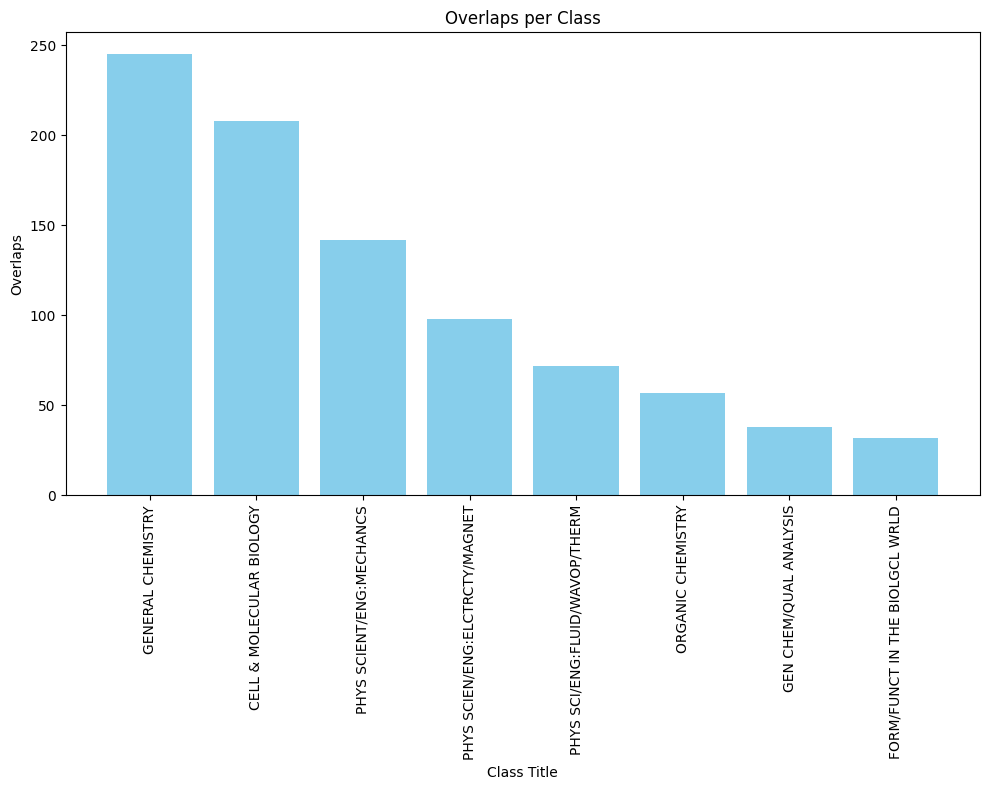

In [8]:
import matplotlib.pyplot as plt

# loading the amount of overlaps for each class title
overlap_count = {}

overlap_count = {}
for overlap in title_overlaps:
    overlap_count[overlap[0]] = overlap_count.get(overlap[0], 0) + 1
    overlap_count[overlap[5]] = overlap_count.get(overlap[5], 0) + 1

# Sort the titles by their overlap count
sorted_titles = sorted(overlap_count, key=overlap_count.get, reverse=True)
sorted_counts = [overlap_count[title] for title in sorted_titles]

plt.figure(figsize=(10, 8))
plt.bar(sorted_titles, sorted_counts, color="skyblue")

plt.title("Overlaps per Class")
plt.xlabel("Class Title")
plt.ylabel("Overlaps")

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

<b> comments about data </b> <br>
    - The functionality of this, allows for EACH CLASS to be checked against every single other entry
    - The function skips classes that have the same Title, CRN, and Subject
    - with 205 data points in this example, there will be a large number of pairs to check
    - we can calculate the maximum number of unique cominbations of pairs that can be formed
    
    n * (n - 1) / 2
    - where n is the total number of items in a set
    205 * 204 / 2 = 20910 pairs, our result of 1317 overlaps is reasonable
    
    difference between time conflicts, start times to end times
    two specific departments
    
    
    
    
    GOAL
    
    propose for the lab schedules across departments come together for synchronized lab times
    
    only labs
    Spring 2023 - Winter 2024
    determine start times
    how many labs
    
    
    

In [9]:
class_info

[('FORM/FUNCT IN THE BIOLGCL WRLD',
  '08:30 AM-11:20 AM',
  'TTh',
  'BIOL',
  'D006A',
  '01Y'),
 ('FORM/FUNCT IN THE BIOLGCL WRLD',
  '11:30 AM-02:20 PM',
  'TTh',
  'BIOL',
  'D006A',
  '02Y'),
 ('CELL & MOLECULAR BIOLOGY',
  '09:30 AM-11:20 AM',
  'MW',
  'BIOL',
  'D006B',
  '01Y'),
 ('CELL & MOLECULAR BIOLOGY',
  '09:30 AM-12:20 PM',
  'TTh',
  'BIOL',
  'D006B',
  '01Y'),
 ('CELL & MOLECULAR BIOLOGY',
  '09:30 AM-11:20 AM',
  'MW',
  'BIOL',
  'D006B',
  '02Y'),
 ('CELL & MOLECULAR BIOLOGY',
  '01:30 PM-04:20 PM',
  'TTh',
  'BIOL',
  'D006B',
  '02Y'),
 ('CELL & MOLECULAR BIOLOGY',
  '10:30 AM-01:20 PM',
  'MW',
  'BIOL',
  'D006B',
  '03Y'),
 ('CELL & MOLECULAR BIOLOGY',
  '01:30 PM-04:20 PM',
  'MW',
  'BIOL',
  'D006B',
  '04Y'),
 ('CELL & MOLECULAR BIOLOGY',
  '01:30 PM-04:20 PM',
  'MW',
  'BIOL',
  'D006B',
  '05Y'),
 ('CELL & MOLECULAR BIOLOGY',
  '04:30 PM-07:20 PM',
  'MW',
  'BIOL',
  'D006B',
  '06Y'),
 ('CELL & MOLECULAR BIOLOGY',
  '10:30 AM-12:20 PM',
  'MW',
  '